<a href="https://colab.research.google.com/github/UniCandice/NLP/blob/main/toxic_messeages_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic messeages classification



# Instructions

The objective is to build a text classifier to identify toxic comments. We have segmented this notebook into different sections but this structure is just a suggestion, please feel free to adapt the sections to your own working style. The only fixed requirements are that you should develop a model and provide an evaluation of your solution. In particular, we will look for:
* Data exploration and cleaning (if needed)
* Data pipelines and pre/post-processing methods (if any)
* How to evaluate the performance of the model
* How you build and optimise an NLP model
* Visualisations or analysis of the results and the data
* Code organisation and readability

Documenting your notebook is highly encouraged.

We will use the mteb toxic comments dataset: https://huggingface.co/datasets/mteb/toxic_conversations_50k
The cells in this section download the training and testing splits of the dataset in the form of a HuggingFace dataset object.

# Libraries

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

In [ ]:
! pip install talos

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 985.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting unins

In [ ]:
import datasets

dataset_train = datasets.load_dataset('mteb/toxic_conversations_50k', split='train')
dataset_val = datasets.load_dataset('mteb/toxic_conversations_50k', split='test')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

The dataset object contains 3 keys:
* text: the raw text
* label: a numeric label (1 for toxic, 0 for non-toxic)
* label_text: the label as a string

In [ ]:
dataset_train.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'label_text': Value(dtype='string', id=None)}

In [ ]:
# Display some basic information about the datasets
print(f"Train dataset: {dataset_train}")
print(f"Validation dataset: {dataset_val}")

# Preview the first few samples in the train dataset
print(dataset_train[0])

# Preview the first few samples in the validation dataset
print(dataset_val[0])


Train dataset: Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 50000
})
Validation dataset: Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 50000
})
{'text': 'theres not enough going on around here for air service none want to waste there time on this town', 'label': 0, 'label_text': 'not toxic'}
{'text': "Bingo:  Everything is always about growth int he population.  If we curtailed immigration we'd have approximately ZERO population growth.  What a boon for quality of life and the environment!", 'label': 0, 'label_text': 'not toxic'}


In [ ]:
print(dataset_train)

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 50000
})


In [ ]:
print(dataset_val)

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 50000
})


In [ ]:
import pandas as pd

# Convert the datasets to pandas DataFrames
df_train = dataset_train.to_pandas()
df_test = dataset_val.to_pandas()

# Display the first few rows of each DataFrame
print(df_train.head())
print(df_test.head())


                                                text  label label_text
0  theres not enough going on around here for air...      0  not toxic
1                                     How about ZERO      0  not toxic
2  Her name is still floating?  Might I suggest f...      0  not toxic
3  Stop by So Cold at MFNW/Project Pabst! It'll m...      0  not toxic
4  Nobody awake on the bridge, no lookouts ,,no r...      0  not toxic
                                                text  label label_text
0  Bingo:  Everything is always about growth int ...      0  not toxic
1  stop making excuse for your infantile and stup...      1      toxic
2  Here is something else you can do: Get the Gov...      0  not toxic
3  I was asked by a Canada Custom Officer to remo...      0  not toxic
4  The debate is over. 97% of geneticists agree t...      0  not toxic


The dataset is indexable and you can extract the raw text into a list or write it to a temporary file if you prefer.

In [ ]:
# to extract the text into a list
dataset_train[:3]['text']

# to write into a file
with open('temp.txt', 'w') as f:
  for text in dataset_train['text']:
        f.write(text+'\n')

Now that you have access to the raw data, feel free to use whatever approach and libraries you want.

Tip: if you're using google colab, you can mount your drive to this notebook so you can save and load files on google drive:

In [ ]:
# Mount your drive to this Colab notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you need to install libraries that are not included in this environment, you can use
`!pip install [package-name]`.

## load module

In [ ]:
import numpy as np, pandas as pd

!pip install Keras-Preprocessing


import re
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from string import ascii_lowercase

from tqdm import tqdm_notebook
import itertools
import io

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras import initializers, regularizers, constraints, optimizers, layers
import talos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 809.8 kB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data exploration and cleaning

In [ ]:
df_train.shape

(50000, 3)

In [ ]:
df_test.shape

(50000, 3)

check the data first see if there is any null

In [ ]:
df_train.isnull().any()

,0
text,False
label,False
label_text,False


In [ ]:
df_test.isnull().any()

,0
text,False
label,False
label_text,False


In [ ]:
# Separating into two DataFrames
df_train_not_toxic = df_train[df_train['label'] == 0].reset_index(drop=True)
df_train_toxic = df_train[df_train['label'] == 1].reset_index(drop=True)

In [ ]:
df_train_toxic

,text,label,label_text
0,"That was perhaps the most hackneyed vomit, to ...",1,toxic
1,Can she not be dismissed for incompetence and ...,1,toxic
2,"Robben Island won't be big enough, to hold all...",1,toxic
3,"But he is, Blanche! He is a racist!",1,toxic
4,Why? because we are still figuring out a way t...,1,toxic
...,...,...,...
3960,The idea that Obama killed the middle class is...,1,toxic
3961,"And thee very worst of all, do not match her b...",1,toxic
3962,Kira girl is spot-on. It was not justified. ...,1,toxic
3963,"Indeed, her weak agenda has been overlooked du...",1,toxic


In [ ]:
# Saving the toxic DataFrame to a CSV file
df_train_toxic.to_csv('/content/drive/MyDrive/df_train_toxic.csv', index=False)

### text normalization

By utilizing regex patterns, you can effectively handle and detect toxic words with special characters, improving the accuracy and robustness of your text processing or filtering system. In our analysis, we found that 631 out of 3964 toxic sentences contain special characters. Many of these special characters are linked to emotional or offensive words, indicating that people often use such characters to emphasize their emotions or offensiveness.

Interestingly, special characters are also prevalent in non-toxic sentences, with 9542 out of 46027 containing them. This ratio is roughly similar to that in toxic sentences, suggesting that special characters are commonly used in both contexts.

Given these findings, a nuanced approach to text processing is required, where special characters are considered alongside context to differentiate between toxic and non-toxic content effectively. Regex patterns can play a crucial role in this, allowing for sophisticated detection and handling of special characters in various sentence types.

#### find out the special characters in toxic sentence

In [ ]:
# Define regex patterns to search for special characters
special_char = ['\\*', '@', '#', '\\$', '%', '\\^', '&', '\\(', '\\)', '\\+', '=', '\\{', '\\}', '\\[', '\\]', '<', '>', '\\|', '\\\\', '~']

# Find rows containing special characters
special_char = '|'.join(special_char)
special_chars_df = df_train_toxic[df_train_toxic['text'].str.contains(special_char, regex=True)]

# Display the dataframe with special characters
print(special_chars_df)

                                                   text  label label_text
10    President Trump would do well taking the advic...      1      toxic
24    Psssssssst: Vested interest. Of course. "Corru...      1      toxic
25    In fairness to the actual (not imaginary) offe...      1      toxic
30    Nice little partisan barb in the final sentenc...      1      toxic
33    For another the so called “computer models” th...      1      toxic
...                                                 ...    ...        ...
3938  A list of things said no teen ever!!!! I can’t...      1      toxic
3951  Catherine Rampbell Rambling on and on.  Your s...      1      toxic
3955  Resistance isn't futile, it's local and consti...      1      toxic
3960  The idea that Obama killed the middle class is...      1      toxic
3964  Sorry, Venezuelan's got themselves into this m...      1      toxic

[631 rows x 3 columns]


#### find out the special characters in non-toxic sentence

In [ ]:
# Define regex patterns to search for special characters
special_char = ['\\*', '@', '#', '\\$', '%', '\\^', '&', '\\(', '\\)', '\\+', '=', '\\{', '\\}', '\\[', '\\]', '<', '>', '\\|', '\\\\', '~']

# Find rows containing special characters
special_char = '|'.join(special_char)
special_chars_df1 = df_train_not_toxic[df_train_not_toxic['text'].str.contains(special_char, regex=True)]

# Display the dataframe with special characters
print(special_chars_df1)

                                                    text  label label_text
11     YES CANADA IS BACK!!\n\nThe national embarrass...      0  not toxic
16     Young Kimmy is giving us the middle finger.  W...      0  not toxic
18     My recall is that SK has no DST because it wou...      0  not toxic
22     When it comes to the macro side of life, many ...      0  not toxic
25     Evacuation > Prayer.\n"he will send you to liv...      0  not toxic
...                                                  ...    ...        ...
46002  Kudos!  So needed (evidenced by many of the co...      0  not toxic
46008  You got that right, Davis, 90% success rate of...      0  not toxic
46018  Ironically, the self-styled activists who cont...      0  not toxic
46023  Hey "There it is", there it is NOT. Typical we...      0  not toxic
46027  First, an MBA program needs GMAT, not SAT scor...      0  not toxic

[9542 rows x 3 columns]


In [ ]:
# Saving the toxic DataFrame to a CSV file
special_chars_df1.to_csv('/content/drive/MyDrive/special_chars_df1.csv', index=False)

In [ ]:
regex_patterns = {

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#$%\^\&\*]*u[!@#$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 'f**k','fu*k',
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck','%%%% r','f***'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@$$',
            '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#$%\^&\*][@#$%\^&\*]', '[^a-z]anal ', 'a s s','a55', '@$$'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@$$hole', 'a**hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h', 'b!tch', 'bi+ch', 'l3itch'
        ],

    'bastard':
        [
            'ba[s|z]+t[e|a]+rd',
            'bats##t'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k', 'dik'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '$hit', 's h i t', '$h1t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu', 'st*u'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses', 'p*ssy'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
    ' fucking ':
        [
            'f*$%-ing'
        ],
}


In [ ]:
def clean_text(text, repeat_text=True, patterns_text=True, is_lower=True):
    """
    Function to clean the input text with various options.

    Parameters:
    text (str): The input text to be cleaned.
    repeat_text (bool): Flag to determine whether to reduce repeated characters to a single character. Default is True.
    patterns_text (bool): Flag to determine whether to replace specified patterns with target strings. Default is True.
    is_lower (bool): Flag to determine whether to convert text to lowercase. Default is True.

    Returns:
    str: The cleaned text.
    """

    # Convert text to lowercase if is_lower is True
    if is_lower:
        text = text.lower()

    # Replace specified patterns with target strings if patterns_text is True
    if patterns_text:
        for target, patterns in regex_patterns.items():
            for pat in patterns:
                text = str(text).replace(pat, target)

    # Reduce repeated characters to a single character if repeat_text is True
    if repeat_text:
        text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Replace newline characters with a space
    text = str(text).replace("\n", " ")

    # Remove all non-alphanumeric characters except spaces
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove digits from the text
    text = re.sub('[0-9]', "", text)

    # Replace multiple spaces with a single space
    text = re.sub(" +", " ", text)

    # Remove non-ASCII characters
    text = re.sub("([^\x00-\x7F])+", " ", text)

    # Return the cleaned text
    return text

In [ ]:
df_train['text']=df_train['text'].apply(lambda x: clean_text(x))

In [ ]:
df_train['text'][13]

'they are talking points she named no facts can you just one please try referencing someone s letter is not a fact referencing his record on civil rights is not a fact the appropriate thing to reference is his record on following the law as written just years ago clinton obama biden et al opposed gay marriage that s a fact jack '

In [ ]:
df_test['text']=df_test['text'].apply(lambda x: clean_text(x))

In [ ]:
df_test['text'][10]

'what will happen trump s ers will love him more since fox news and trump s tweets are their sole sources of current events fox news echoes trump s falsehoods that puerto rico has received so much help from washington that they have to send stuff back and that fema has people in every nook and cranny of the island the legitimate media exposes the reality most of the population outside san juan is desperate for the basics of food and water and hasn t received any aid from washington trump is one of those people with a horseshoe embedded in a part of his anatomy we ve all known people like him no matter how many lies they throw out there no matter how thick the bs from their mouths no matter how low they go lady luck steps in at the last minute and makes them look good at least i can be sure of one thing trump will spend eternity in purgatory and that warms my heart '

### Lemmatization

In [ ]:
comments_train=df_train['text']
comments_test=df_test['text']

In [ ]:
comments_train=list(comments_train)
comments_test=list(comments_test)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemma(text, lemmatization=True):
    """
    Function to lemmatize the input text.

    Parameters:
    text (str): The input text to be lemmatized.
    lemmatization (bool): Flag to determine whether to perform lemmatization or not. Default is True.

    Returns:
    str: The lemmatized text or the original text based on the lemmatization flag.
    """

    # Initialize the output as an empty string
    output = ""

    if lemmatization:
        # Split the input text into individual words
        text = text.split(" ")

        # Perform lemmatization on each word
        for word in text:
            # Lemmatize the word as a noun
            word1 = wordnet_lemmatizer.lemmatize(word, pos="n")
            # Lemmatize the result as a verb
            word2 = wordnet_lemmatizer.lemmatize(word1, pos="v")
            # Lemmatize the result as an adjective
            word3 = wordnet_lemmatizer.lemmatize(word2, pos="a")
            # Lemmatize the result as an adverb
            word4 = wordnet_lemmatizer.lemmatize(word3, pos="r")
            # Append the lemmatized word to the output string
            output = output + " " + word4
    else:
        # If lemmatization is not required, use the original text
        output = text

    # Return the final output string, stripped of leading/trailing whitespace
    return str(output.strip())


In [ ]:
lem_train_data = []

for line in tqdm_notebook(comments_train, total=len(comments_train)):
    lem_train_data.append(lemma(line))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
lem_train_data[4]

'nobody awake on the bridge no lookout no radar tech never saw the ship light oh boy'

In [ ]:
lem_test_data = []

for line in tqdm_notebook(comments_test, total=len(comments_test)):
    lem_test_data.append(lemma(line))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
lem_test_data[4]

'the debate be over of geneticist agree that sex be determine by chromosome'

## stopwords removal

In [ ]:
Total_stopword=STOP_WORDS

In [ ]:
def stopwords(text, rem_stop_wrds=True):
    """
    Function to remove stopwords from the input text.

    Parameters:
    text (str): The input text from which stopwords are to be removed.
    rem_stop_wrds (bool): Flag to determine whether to remove stopwords or not. Default is True.

    Returns:
    str: The text with stopwords removed or the original text based on the rem_stop_wrds flag.
    """

    # Initialize the output text as an empty string
    output_text = ""

    if rem_stop_wrds:
        # Split the input text into individual words
        text = text.split(" ")

        # Iterate over each word in the text
        for word in text:
            # Check if the word is not in the list of stopwords
            if word not in Total_stopword:
                # Append the word to the output text if it is not a stopword
                output_text = output_text + " " + word
    else:
        # If stopword removal is not required, use the original text
        output_text = text

    # Return the final output text, stripped of leading/trailing whitespace
    return str(output_text.strip())


In [ ]:
proc_train_data = []

for line in tqdm_notebook(lem_train_data, total=len(comments_train)):
    proc_train_data.append(stopwords(line))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
proc_train_data[10]

'anonymous s difficult accurate statistic aa number available indicate doe high success rate'

In [ ]:
proc_test_data = []

for line in tqdm_notebook(lem_test_data, total=len(comments_train)):
    proc_test_data.append(stopwords(line))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
proc_train_data[3]

'stop cold mfnw project pabst ll list socoldpdx com'

In [ ]:
# Create a DataFrame to store the texts and word counts
df1 = pd.DataFrame(proc_train_data, columns=['text'])
df1['word_count'] = df1['text'].apply(lambda x: len(x.split()))
df1.head()

,text,word_count
0,air service want waste time town,6
1,zero,1
2,float suggest flush twice,4
3,stop cold mfnw project pabst ll list socoldpdx...,9
4,awake bridge lookout radar tech saw ship light...,10


In [ ]:
# Create a DataFrame to store the texts and word counts
df2 = pd.DataFrame(proc_test_data, columns=['text'])
df2['word_count'] = df2['text'].apply(lambda x: len(x.split()))
df2.head()

,text,word_count
0,bingo growth int population curtail immigratio...,15
1,stop excuse infantile stupid behavior way expr...,57
2,gov stop politicize investment process fund no...,23
3,wa ask canada custom officer remove sun glass ...,16
4,debate geneticist agree sex determine chromosome,6


# Tokenization and Embedding

We conducted an analysis of the word distribution in both the training and test datasets to determine an appropriate value for maxpadlen in tokenization and embedding. The results indicate that most word lengths fall within the 0-30 range, with lengths rarely exceeding 100.

We tested the training process with maxpadlen set to both 30 and 100 and observed no significant difference in accuracy. This outcome is understandable, as many offensive sentences contain repetitive toxic words. Therefore, we recommend using maxpadlen = 30 for optimal efficiency.

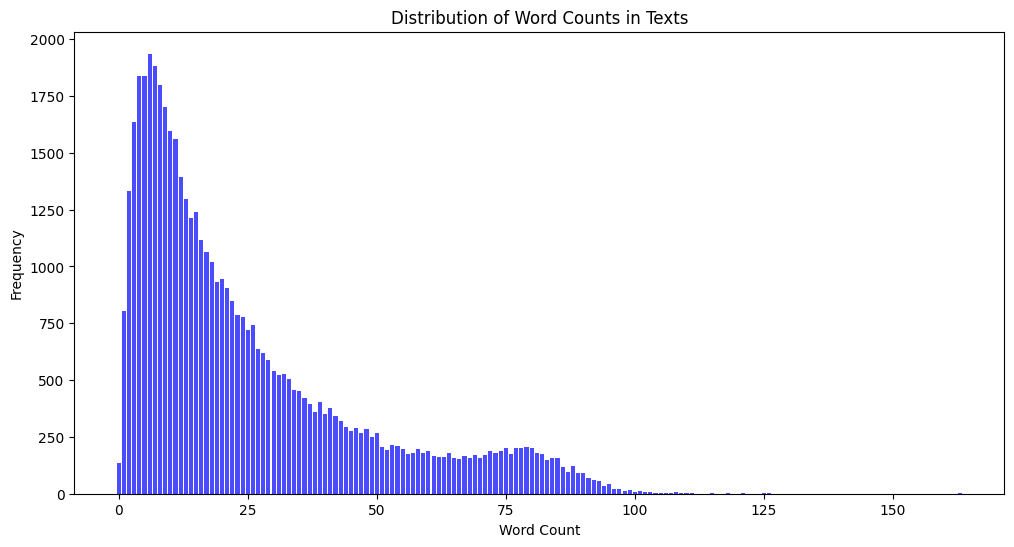

Maximum word count: 163
Word count distribution:
 word_count
0       134
1       805
2      1331
3      1635
4      1840
       ... 
118       1
121       1
125       1
126       1
163       1
Name: count, Length: 118, dtype: int64


In [ ]:
# Count the distribution of the word counts
word_count_distribution = df1['word_count'].value_counts().sort_index()

# Find the maximum word count
max_word_count = df1['word_count'].max()

# Plot the distribution of word counts
plt.figure(figsize=(12, 6))
plt.bar(word_count_distribution.index, word_count_distribution.values, color='blue', alpha=0.7)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Texts')
plt.show()

print("Maximum word count:", max_word_count)
print("Word count distribution:\n", word_count_distribution)

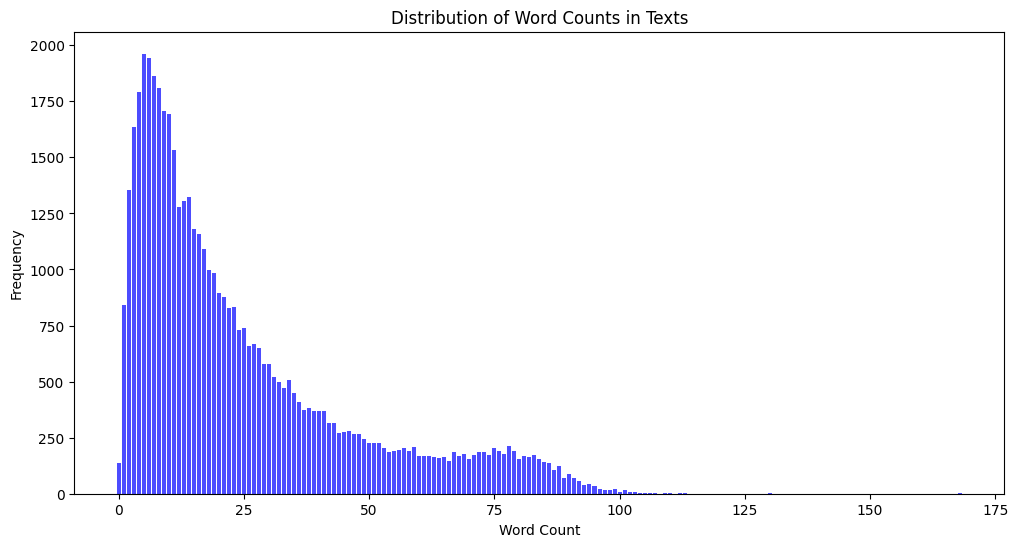

Maximum word count: 168
Word count distribution:
 word_count
0       136
1       843
2      1356
3      1636
4      1792
       ... 
110       2
112       1
113       2
130       1
168       1
Name: count, Length: 114, dtype: int64


In [ ]:
# Count the distribution of the word counts
word_count_distribution = df2['word_count'].value_counts().sort_index()

# Find the maximum word count
max_word_count = df2['word_count'].max()

# Plot the distribution of word counts
plt.figure(figsize=(12, 6))
plt.bar(word_count_distribution.index, word_count_distribution.values, color='blue', alpha=0.7)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Texts')
plt.show()

print("Maximum word count:", max_word_count)
print("Word count distribution:\n", word_count_distribution)

In [ ]:
max_features=100000
maxpadlen =30
val_split = 0.5  # val / test
embed_dim_fasttext = 300 #wiki-news-300d-1M.vec

## Tokenization

In [ ]:
# Initialize the tokenizer with a maximum number of words to keep based on word frequency.
tokenizer = Tokenizer(num_words=max_features)

# Fit the tokenizer on the training data to learn the word index.
tokenizer.fit_on_texts(list(proc_train_data))

# Convert training texts to sequences of integers.
list_tokenized_train = tokenizer.texts_to_sequences(proc_train_data)

# Convert test texts to sequences of integers using the same tokenizer.
list_tokenized_test = tokenizer.texts_to_sequences(proc_test_data)


In [ ]:
word_index=tokenizer.word_index
print("Words in Vocabulary: ",len(word_index))

Words in Vocabulary:  41081


In [ ]:
print(word_index)

{'s': 1, 't': 2, 'wa': 3, 'people': 4, 'ha': 5, 'like': 6, 'trump': 7, 'good': 8, 'don': 9, 'think': 10, 'u': 11, 'year': 12, 'time': 13, 'know': 14, 'need': 15, 'right': 16, 'state': 17, 'tax': 18, 'want': 19, 'work': 20, 'pay': 21, 'way': 22, 'government': 23, 'use': 24, 'm': 25, 'thing': 26, 'come': 27, 'money': 28, 'country': 29, 'doe': 30, 'vote': 31, 'look': 32, 'canada': 33, 'law': 34, 'fact': 35, 'day': 36, 'try': 37, 'long': 38, 'leave': 39, 'mean': 40, 'comment': 41, 'point': 42, 'problem': 43, 'job': 44, 'let': 45, 'bad': 46, 'change': 47, 'life': 48, 'world': 49, 'find': 50, 'win': 51, 'new': 52, 'live': 53, 'support': 54, 'american': 55, 'care': 56, 'tell': 57, 'public': 58, 'liberal': 59, 'issue': 60, 'canadian': 61, 'great': 62, 'president': 63, 'read': 64, 'woman': 65, 'article': 66, 'believe': 67, 'doesn': 68, 'big': 69, 'party': 70, 'far': 71, 'high': 72, 'cost': 73, 'start': 74, 'house': 75, 'run': 76, 'post': 77, 'happen': 78, 'help': 79, 'didn': 80, 'lot': 81, 'sur

In [ ]:
# Pad the sequences for the training data to ensure they all have the same length.
# The padding is done after the end of each sequence ('post').
X_t = pad_sequences(list_tokenized_train, maxlen=maxpadlen, padding='post')

# Pad the sequences for the test data to ensure they all have the same length.
# The padding is done after the end of each sequence ('post').
X_te = pad_sequences(list_tokenized_test, maxlen=maxpadlen, padding='post')


In [ ]:
x_tr = X_t

In [ ]:
print('Tokenized sentences: \n', X_t[10])

Tokenized sentences: 
 [2963    1  844 1316 1705 3901  165  648 1381   30   72 1130  204    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
X_te

array([[5776,  859, 8365, ...,    0,    0,    0],
       [ 611,   70, 8750, ...,  179, 1057,   11],
       [ 787,   89, 7325, ...,    0,    0,    0],
       ...,
       [ 864,   77, 1509, ...,    0,    0,    0],
       [5925,  120,  681, ...,    0,    0,    0],
       [1674, 1716,  345, ...,  673,  376,  345]], dtype=int32)

In [ ]:
print('Tokenized sentences: \n', X_te[10])

Tokenized sentences: 
 [22403  6781 13048    91    14     4     6   134   145   515   134  3923
   327  1030   134   135  1389  1161   512   846    32     8    82    26
     7   103  8071 16522   737   790]


In [ ]:
y = df_train['label'].values
y_tr = y.reshape((-1,1))

In [ ]:
Y_te = df_test['label'].values
Y_te = Y_te.reshape((-1, 1))

In [ ]:
X_te.shape

(50000, 30)

In [ ]:
y_tr.shape

(50000, 1)

In [ ]:
indices = np.arange(X_te.shape[0])
np.random.shuffle(indices)

In [ ]:
X_te = X_te[indices]
labels = Y_te[indices]

In [ ]:
num_val_samples = int(val_split*X_te.shape[0])
x_val = X_te[: -num_val_samples]
y_val = labels[: -num_val_samples]
x_test = X_te[-num_val_samples: ]
y_test = labels[-num_val_samples: ]

## Embedding
1. Deep learning models can leverage pre-trained word embeddings that capture semantic meaning and relationships between words. This allows the model to understand context better than traditional methods.

2. The wiki-news-300d-1M.vec file is a word embedding model trained on Wikipedia data, which means it has been trained to represent words in a vector space where words with similar meanings are closer together.

3. In essence, wiki-news-300d-1M.vec is suitable for toxic words classification because it provides a rich, semantic representation of words that helps in identifying various forms of toxic language based on their contextual and semantic similarities.

In [ ]:
# Initialize the dictionary to hold embeddings
embed_index_fasttext = {}

# Open the FastText embedding file
with open('/content/drive/MyDrive/wiki-news-300d-1M.vec', encoding='utf8') as f:
    # Read each line in the file
    for line in f:
        # Split the line into word and embedding values
        values = line.split()
        # Extract the word (first item)
        word = values[0]
        # Convert the embedding values to a NumPy array of type float32
        embedding = np.asarray(values[1:], dtype='float32')
        # Store the word and its embedding in the dictionary
        embed_index_fasttext[word] = embedding

In [ ]:
# Initialize an embedding matrix with random values. The matrix has a shape of (vocabulary size + 1, embedding dimension).
embed_matrix_fasttext = np.random.random((len(word_index) + 1, embed_dim_fasttext))
# Initialize a counter for non-None embedding vectors
non_none_count = 0

# Iterate through the word index dictionary to assign pre-trained embeddings to the corresponding indices in the embedding matrix
for word, i in word_index.items():
    embed_vector = embed_index_fasttext.get(word)  # Retrieve the embedding vector for the word from the embedding index
    if embed_vector is not None:  # If the embedding vector exists
        embed_matrix_fasttext[i] = embed_vector  # Assign the embedding vector to the corresponding index in the embedding matrix
        non_none_count +=1 # Increment the counter
# Print the count of non-None embedding vectors
print(f"Number of words with pre-trained embeddings: {non_none_count}")

Number of words with pre-trained embeddings: 29933


In [ ]:
embed_matrix_fasttext.shape

(41082, 300)

# Modelling


# Why we choose deep learning methond rather than traditional ML
Using deep learning methods for toxic classification offers several advantages over traditional machine learning approaches.
## Handling Complex Data Patterns
* Feature Extraction: Deep learning models, especially neural networks, can automatically learn and extract features from raw text data, eliminating the need for manual feature engineering.
* Non-linear Relationships: These models can capture complex, non-linear relationships in the data, which are often present in natural language.
## Dealing with Large Datasets
* Scalability: Deep learning models perform well with large datasets. More data usually leads to better performance as the models can learn more intricate patterns and nuances in the text.
* Data Augmentation: Techniques such as word embeddings (Word2Vec, GloVe) and transfer learning (using pre-trained models like BERT) can enhance the model's ability to understand context and semantics.
## Scalability:
Deep learning models can scale with the availability of computational resources. With advancements in hardware (e.g., GPUs, TPUs) and frameworks (e.g., TensorFlow, PyTorch), these models can be efficiently trained and deployed for real-time toxic content detection.
## Higher Accuracy:
Due to their ability to model complex patterns and relationships in data, deep learning methods often achieve higher accuracy in toxic classification compared to traditional methods.

In [ ]:
def toxic_classifier(x_train, y_train, x_val, y_val, params):

    # Define input layer with shape (maxpadlen,)
    inp = Input(shape=(maxpadlen,), dtype='int32')

    # Define embedding layer with pre-trained fasttext embeddings
    embedding_layer = Embedding(len(word_index) + 1,
                                embed_dim_fasttext,
                                weights=[embed_matrix_fasttext],
                                input_length=maxpadlen,
                                trainable=False,
                                name='embeddings')

    # Apply embedding layer to input
    embedded_sequences = embedding_layer(inp)

    # Add LSTM layer with output units defined in params
    x = LSTM(params['output_count_lstm'], return_sequences=True, name='lstm_layer')(embedded_sequences)

    # Add Conv1D layer with filters, kernel size, and activation defined in params
    x = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], padding='same', activation='relu', kernel_initializer='he_uniform')(x)

    # Add MaxPooling1D layer with pool size defined in params
    x = MaxPooling1D(params['pool_size'])(x)

    # Add GlobalMaxPooling1D layer
    x = GlobalMaxPool1D()(x)

    # Add BatchNormalization layer
    x = BatchNormalization()(x)

    # Add first Dense layer with units and activation defined in params
    x = Dense(params['output_1_count_dense'], activation=params['activation'], kernel_initializer='he_uniform')(x)

    # Add Dropout layer with dropout rate defined in params
    x = Dropout(params['dropout'])(x)

    # Add second Dense layer with units and activation defined in params
    x = Dense(params['output_2_count_dense'], activation=params['activation'], kernel_initializer='he_uniform')(x)

    # Add another Dropout layer with dropout rate defined in params
    x = Dropout(params['dropout'])(x)

    # Add final Dense layer with 1 output unit and activation defined in params
    preds = Dense(1, activation=params['last_activation'], kernel_initializer='glorot_uniform')(x)

    # Create the model with input and output layers
    model = Model(inputs=inp, outputs=preds)

    # Compile the model with loss function, optimizer, and metrics defined in params
    model.compile(loss=params['loss'], optimizer=params['optimizer'], metrics=['accuracy'])

    # Train the model with training data, validation data, epochs, and batch size defined in params
    model_info = model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(x_val, y_val))

    # Return training history and the model
    return model_info, model


Combined Strengths of LSTM+CNN:Local and Temporal Features: CNNs excel at extracting local patterns, while LSTMs are good at modeling long-range dependencies. Combining them leverages

## Advantages of LSTM+CNN Compared to Traditional Machine Learning and Transformers

### Compared to Traditional Machine Learning
The combination of LSTM and CNN in deep learning models offers significant advantages over traditional machine learning approaches. This hybrid model leverages CNNs to capture local features and patterns, while LSTMs handle temporal dependencies in sequences, allowing for automated feature extraction. Unlike traditional methods that require manual feature engineering, LSTM+CNN models can automatically extract relevant features. LSTMs excel at understanding the context and order of words in sequential data, providing deeper contextual understanding compared to traditional methods that rely on simpler statistical correlations. Consequently, LSTM+CNN models achieve higher accuracy in tasks requiring nuanced understanding of sequences, such as sentiment analysis and toxic classification, outperforming traditional machine learning models that struggle with complex patterns and dependencies.



### Compared to Transformers
LSTM+CNN models are generally less computationally intensive than transformers, making them more feasible for environments with limited resources. They have a simpler architecture compared to the complex, multi-layered attention mechanisms in transformers, which can make LSTM+CNN models easier to implement, interpret, and debug. Additionally, LSTM+CNN models can be more effective on smaller datasets, as they do not require as much data to train effectively, whereas transformers often need large amounts of data to achieve optimal performance. For real-time applications, LSTM+CNN models offer faster inference times, making them more suitable for scenarios where quick responses are necessary, while the complexity of transformers can result in slower inference times.

In [ ]:
# Prepare parameter grid
p={
    'output_count_lstm': [50,60],
    'output_1_count_dense': [40,50],
    'output_2_count_dense': [30,40],
    'filters' : [64],
    'kernel_size' : [3],
    'batch_size': [32],
    'pool_size': [3],
    'epochs':[2],
    'optimizer':['adam'],
    'activation':['relu'],
    'last_activation': ['sigmoid'],
    'dropout':[0.1,0.2],
    'loss': ['binary_crossentropy']
}

Grid search is a hyperparameter tuning method that involves exhaustively searching through a predefined set of hyperparameters for the best combination that yields the highest performance for a model. For a CNN+LSTM model, grid search can be particularly useful as it helps optimize the parameters of both the CNN and LSTM components.

In [ ]:
scan_results = talos.Scan(
    x=x_tr,                # Training data features
    y=y_tr,                # Training data labels
    x_val=x_val,           # Validation data features
    y_val=y_val,           # Validation data labels
    model=toxic_classifier, # Model function to be used in the scan
    params=p,              # Parameter grid for hyperparameter tuning
    experiment_name='tcc', # Name of the experiment: grid search method
    print_params=True      # Flag to print the parameters being used
)


  0%|          | 0/16 [00:00<?, ?it/s]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 82s 49ms/step - loss: 0.2135 - accuracy: 0.9251 - val_loss: 0.1886 - val_accuracy: 0.9332
Epoch 2/2
1563/1563 [==============================] - 83s 53ms/step - loss: 0.1732 - accuracy: 0.9381 - val_loss: 0.1717 - val_accuracy: 0.9382


  6%|▋         | 1/16 [02:47<41:59, 167.98s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 89s 54ms/step - loss: 0.2184 - accuracy: 0.9251 - val_loss: 0.1686 - val_accuracy: 0.9379
Epoch 2/2
1563/1563 [==============================] - 73s 47ms/step - loss: 0.1809 - accuracy: 0.9334 - val_loss: 0.1625 - val_accuracy: 0.9408


 12%|█▎        | 2/16 [05:31<38:37, 165.51s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 84s 50ms/step - loss: 0.2069 - accuracy: 0.9282 - val_loss: 0.1735 - val_accuracy: 0.9388
Epoch 2/2
1563/1563 [==============================] - 75s 48ms/step - loss: 0.1728 - accuracy: 0.9376 - val_loss: 0.1870 - val_accuracy: 0.9312


 19%|█▉        | 3/16 [09:00<40:06, 185.15s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 90s 55ms/step - loss: 0.2181 - accuracy: 0.9252 - val_loss: 0.1876 - val_accuracy: 0.9323
Epoch 2/2
1563/1563 [==============================] - 75s 48ms/step - loss: 0.1772 - accuracy: 0.9358 - val_loss: 0.1715 - val_accuracy: 0.9390


 25%|██▌       | 4/16 [12:28<38:49, 194.14s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 90s 55ms/step - loss: 0.2099 - accuracy: 0.9275 - val_loss: 0.1879 - val_accuracy: 0.9286
Epoch 2/2
1563/1563 [==============================] - 78s 50ms/step - loss: 0.1719 - accuracy: 0.9373 - val_loss: 0.1724 - val_accuracy: 0.9408


 31%|███▏      | 5/16 [15:18<34:02, 185.66s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 81s 48ms/step - loss: 0.2172 - accuracy: 0.9263 - val_loss: 0.1714 - val_accuracy: 0.9373
Epoch 2/2
1563/1563 [==============================] - 76s 49ms/step - loss: 0.1756 - accuracy: 0.9364 - val_loss: 0.1672 - val_accuracy: 0.9388


 38%|███▊      | 6/16 [18:47<32:14, 193.43s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 91s 56ms/step - loss: 0.2077 - accuracy: 0.9290 - val_loss: 0.1822 - val_accuracy: 0.9415
Epoch 2/2
1563/1563 [==============================] - 78s 50ms/step - loss: 0.1730 - accuracy: 0.9379 - val_loss: 0.1609 - val_accuracy: 0.9411


 44%|████▍     | 7/16 [22:14<29:42, 198.07s/it]

{'output_count_lstm': 50, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 90s 55ms/step - loss: 0.2126 - accuracy: 0.9265 - val_loss: 0.2021 - val_accuracy: 0.9343
Epoch 2/2
1563/1563 [==============================] - 76s 48ms/step - loss: 0.1769 - accuracy: 0.9361 - val_loss: 0.1649 - val_accuracy: 0.9397


 50%|█████     | 8/16 [25:42<26:48, 201.05s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 95s 58ms/step - loss: 0.2051 - accuracy: 0.9284 - val_loss: 0.1690 - val_accuracy: 0.9394
Epoch 2/2
1563/1563 [==============================] - 91s 58ms/step - loss: 0.1734 - accuracy: 0.9380 - val_loss: 0.1628 - val_accuracy: 0.9418


 56%|█████▋    | 9/16 [29:11<23:44, 203.50s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 87s 53ms/step - loss: 0.2189 - accuracy: 0.9262 - val_loss: 0.1881 - val_accuracy: 0.9380
Epoch 2/2
1563/1563 [==============================] - 90s 57ms/step - loss: 0.1788 - accuracy: 0.9363 - val_loss: 0.1666 - val_accuracy: 0.9406


 62%|██████▎   | 10/16 [32:10<19:35, 195.94s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 90s 54ms/step - loss: 0.2077 - accuracy: 0.9277 - val_loss: 0.1670 - val_accuracy: 0.9390
Epoch 2/2
1563/1563 [==============================] - 93s 60ms/step - loss: 0.1731 - accuracy: 0.9374 - val_loss: 0.1636 - val_accuracy: 0.9419


 69%|██████▉   | 11/16 [35:15<16:02, 192.57s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 40, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 95s 57ms/step - loss: 0.2156 - accuracy: 0.9258 - val_loss: 0.1953 - val_accuracy: 0.9356
Epoch 2/2
1563/1563 [==============================] - 93s 60ms/step - loss: 0.1758 - accuracy: 0.9351 - val_loss: 0.1628 - val_accuracy: 0.9416


 75%|███████▌  | 12/16 [38:44<13:10, 197.57s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 100s 61ms/step - loss: 0.2081 - accuracy: 0.9276 - val_loss: 0.1760 - val_accuracy: 0.9405
Epoch 2/2
1563/1563 [==============================] - 90s 58ms/step - loss: 0.1724 - accuracy: 0.9379 - val_loss: 0.1643 - val_accuracy: 0.9386


 81%|████████▏ | 13/16 [42:12<10:02, 200.82s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 30, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 97s 58ms/step - loss: 0.2269 - accuracy: 0.9200 - val_loss: 0.1708 - val_accuracy: 0.9392
Epoch 2/2
1563/1563 [==============================] - 91s 58ms/step - loss: 0.1791 - accuracy: 0.9360 - val_loss: 0.1798 - val_accuracy: 0.9345


 88%|████████▊ | 14/16 [45:22<06:35, 197.57s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.1, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 97s 58ms/step - loss: 0.2048 - accuracy: 0.9291 - val_loss: 0.1832 - val_accuracy: 0.9340
Epoch 2/2
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1735 - accuracy: 0.9371 - val_loss: 0.1624 - val_accuracy: 0.9406


 94%|█████████▍| 15/16 [48:32<03:15, 195.35s/it]

{'output_count_lstm': 60, 'output_1_count_dense': 50, 'output_2_count_dense': 40, 'filters': 64, 'kernel_size': 3, 'batch_size': 32, 'pool_size': 3, 'epochs': 2, 'optimizer': 'adam', 'activation': 'relu', 'last_activation': 'sigmoid', 'dropout': 0.2, 'loss': 'binary_crossentropy'}
Epoch 1/2
1563/1563 [==============================] - 95s 58ms/step - loss: 0.2185 - accuracy: 0.9242 - val_loss: 0.1807 - val_accuracy: 0.9354
Epoch 2/2
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1766 - accuracy: 0.9358 - val_loss: 0.1607 - val_accuracy: 0.9408


100%|██████████| 16/16 [52:01<00:00, 195.10s/it]


In [ ]:
analyze_object = talos.Analyze(scan_results)

In [ ]:
analyze_object.best_params('val_accuracy', ['accuracy', 'loss', 'val_loss'])

array([[40, 40, 32, 64, 0.1, 2, 'adam', 2, '07/21/24-060223', 'sigmoid',
        '07/21/24-055919', 3, 60, 3, 'relu', 183.9881293773651, 0],
       [40, 30, 32, 64, 0.1, 2, 'adam', 2, '07/21/24-055619', 'sigmoid',
        '07/21/24-055251', 3, 60, 3, 'relu', 207.984543800354, 1],
       [40, 40, 32, 64, 0.2, 2, 'adam', 2, '07/21/24-060552', 'sigmoid',
        '07/21/24-060224', 3, 60, 3, 'relu', 207.71268701553345, 2],
       [50, 40, 32, 64, 0.1, 2, 'adam', 2, '07/21/24-054922', 'sigmoid',
        '07/21/24-054556', 3, 50, 3, 'relu', 206.5553798675537, 3],
       [50, 40, 32, 64, 0.2, 2, 'adam', 2, '07/21/24-061909', 'sigmoid',
        '07/21/24-061541', 3, 60, 3, 'relu', 207.68631052970886, 4],
       [40, 30, 32, 64, 0.2, 2, 'adam', 2, '07/21/24-053240', 'sigmoid',
        '07/21/24-052957', 3, 50, 3, 'relu', 162.99527740478516, 5],
       [50, 30, 32, 64, 0.1, 2, 'adam', 2, '07/21/24-054227', 'sigmoid',
        '07/21/24-053937', 3, 50, 3, 'relu', 169.7248089313507, 6],
       [40,

In [ ]:
model_id = scan_results.data['val_loss'].astype('float').argmax()
model_id

2

In [ ]:
scan_results.data[0:13]

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,output_count_lstm,output_1_count_dense,...,filters,kernel_size,batch_size,pool_size,epochs,optimizer,activation,last_activation,dropout,loss
0,07/21/24-052709,07/21/24-052955,166.519024,2,0.173156,0.93808,0.171670,0.93820,50,40,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy
1,07/21/24-052957,07/21/24-053240,162.995277,2,0.180899,0.93336,0.162529,0.94076,50,40,...,64,3,32,3,2,adam,relu,sigmoid,0.2,binary_crossentropy
2,07/21/24-053240,07/21/24-053608,207.717656,2,0.172802,0.93758,0.187026,0.93124,50,40,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy
3,07/21/24-053609,07/21/24-053935,206.428764,2,0.177201,0.93580,0.171482,0.93900,50,40,...,64,3,32,3,2,adam,relu,sigmoid,0.2,binary_crossentropy
4,07/21/24-053937,07/21/24-054227,169.724809,2,0.171855,0.93734,0.172363,0.94076,50,50,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy
5,07/21/24-054227,07/21/24-054555,207.668095,2,0.175641,0.93642,0.167245,0.93884,50,50,...,64,3,32,3,2,adam,relu,sigmoid,0.2,binary_crossentropy
6,07/21/24-054556,07/21/24-054922,206.555380,2,0.172995,0.93790,0.160942,0.94108,50,50,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy
7,07/21/24-054924,07/21/24-055250,206.530961,2,0.176865,0.93610,0.164942,0.93968,50,50,...,64,3,32,3,2,adam,relu,sigmoid,0.2,binary_crossentropy
8,07/21/24-055251,07/21/24-055619,207.984544,2,0.173378,0.93798,0.162813,0.94184,60,40,...,64,3,32,3,2,adam,relu,sigmoid,0.1,binary_crossentropy
9,07/21/24-055620,07/21/24-055918,178.052646,2,0.178780,0.93632,0.166642,0.94064,60,40,...,64,3,32,3,2,adam,relu,sigmoid,0.2,binary_crossentropy


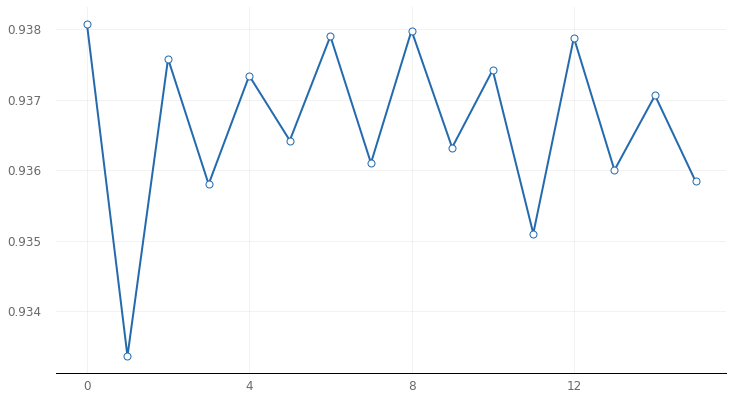

In [ ]:
analyze_object.plot_line('accuracy')

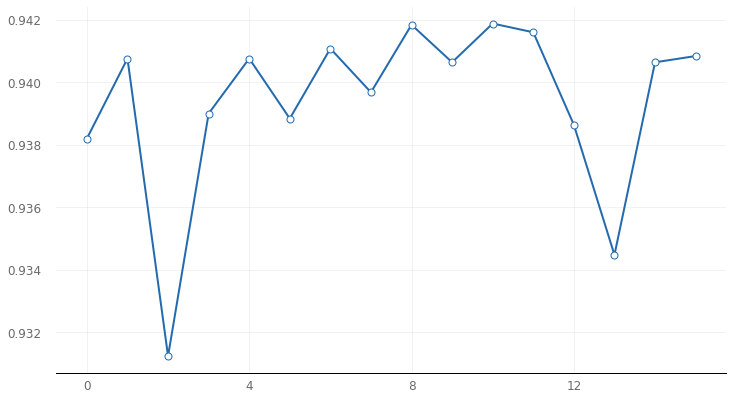

In [ ]:
analyze_object.plot_line('val_accuracy')

## best parameters

In [ ]:
inp=Input(shape=(maxpadlen, ),dtype='int32')

In [ ]:
# Create an embedding layer
embedding_layer = Embedding(
    len(word_index) + 1,         # Vocabulary size (+1 for padding token)
    embed_dim_fasttext,          # Dimension of the embeddings
    weights=[embed_matrix_fasttext],  # Pre-trained FastText embedding matrix
    input_length=maxpadlen,      # Length of input sequences
    trainable=False,             # Set to False to prevent updating the pre-trained embeddings during training
    name='embeddings'            # Name the embedding layer 'embeddings'
)

# Apply the embedding layer to the input sequence
embedded_sequences = embedding_layer(inp)


In [ ]:
# Apply an LSTM layer with 50 units, return sequences, and name it 'lstm_layer'. This layer processes the embedded sequences.
x = LSTM(50, return_sequences=True, name='lstm_layer')(embedded_sequences)

# Apply a 1D convolutional layer with 64 filters, a kernel size of 3, 'same' padding, ReLU activation, and He uniform initializer.
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform')(x)

# Apply a 1D max pooling layer with a pool size of 3 to reduce the dimensionality.
x = MaxPooling1D(3)(x)

# Apply a global max pooling layer to reduce the tensor to a vector by taking the maximum value over the time steps.
x = GlobalMaxPool1D()(x)

# Apply batch normalization to normalize the activations of the previous layer.
x = BatchNormalization()(x)

# Apply a dense (fully connected) layer with 40 units, ReLU activation, and He uniform initializer.
x = Dense(40, activation="relu", kernel_initializer='he_uniform')(x)

# Apply dropout with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0.
x = Dropout(0.2)(x)

# Apply another dense layer with 30 units, ReLU activation, and He uniform initializer.
x = Dense(30, activation="relu", kernel_initializer='he_uniform')(x)

# Apply another dropout with a rate of 0.2 to prevent overfitting.
x = Dropout(0.2)(x)

# Apply a dense layer with 1 unit and sigmoid activation function for binary classification. Use Glorot uniform initializer.
preds = Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform')(x)


In [ ]:
model_2 = Model(inputs=inp, outputs=preds)
model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embeddings (Embedding)      (None, 30, 300)           12324600  
                                                                 
 lstm_layer (LSTM)           (None, 30, 50)            70200     
                                                                 
 conv1d (Conv1D)             (None, 30, 64)            9664      
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 64)            0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                             

In [ ]:
model_info_2=model_2.fit(x_tr,y_tr, epochs=2, batch_size=32,  validation_data=(x_val, y_val))


Epoch 1/2
1563/1563 [==============================] - 81s 49ms/step - loss: 0.2197 - accuracy: 0.9249 - val_loss: 0.1854 - val_accuracy: 0.9388
Epoch 2/2
1563/1563 [==============================] - 85s 54ms/step - loss: 0.1822 - accuracy: 0.9344 - val_loss: 0.1640 - val_accuracy: 0.9400


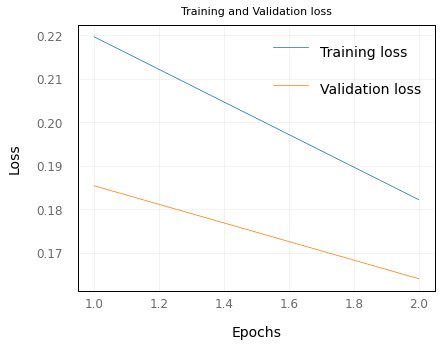

In [ ]:
import matplotlib.pyplot as plt


# Change default font
plt.rcParams['font.family'] = 'DejaVu Sans'

loss = model_info_2.history['loss']
val_loss = model_info_2.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

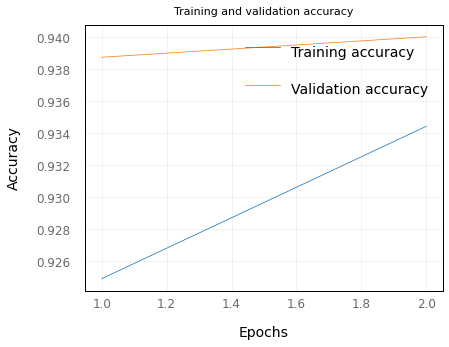

In [ ]:
import matplotlib.pyplot as plt


# Change default font
plt.rcParams['font.family'] = 'DejaVu Sans'

accuracy = model_info_2.history['accuracy']
val_accuracy = model_info_2.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
model_2.save(filepath="/content/drive/MyDrive/model2_30_2.h5")

In [ ]:
loaded_model_2 = keras.models.load_model(filepath="/content/drive/MyDrive/model2_30_2.h5")

# Evaluation

# test model

In [ ]:
test_values_2 = loaded_model_2.predict([x_test], batch_size=1, verbose=1)

25000/25000 [==============================] - 173s 7ms/step


In [ ]:
print(test_values_2)

[[0.04273722]
 [0.00401788]
 [0.01797895]
 ...
 [0.08804039]
 [0.01539634]
 [0.04155523]]


In [ ]:
print(y_test)
y_test.shape

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


(25000, 1)

Optimal Threshold (Max F1): 0.47
Max F1 Score: 0.58


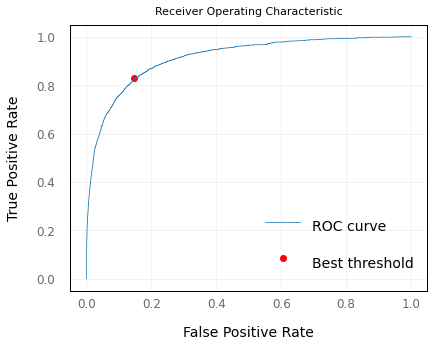

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, roc_curve
import matplotlib.pyplot as plt


# Change default font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_values_2)

# Loop through thresholds to find the max F1 score
max_f1 = 0
best_threshold = 0
for threshold in thresholds:
    predictions = [1 if prob >= threshold else 0 for prob in test_values_2]
    f1 = f1_score(y_test, predictions)
    if f1 > max_f1:
        max_f1 = f1
        best_threshold = threshold

print(f'Optimal Threshold (Max F1): {best_threshold:.2f}')
print(f'Max F1 Score: {max_f1:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


* ROC Curve (Blue Line): The blue line plots the trade-off between the true positive rate and the false positive rate for different threshold values of the classifier. A perfect classifier would pass through the top-left corner (0,1), indicating a true positive rate of 1 and a false positive rate of 0.

* Best Threshold (Red Dot): The red dot indicates the point on the ROC curve that represents the best threshold (Threshold (Max F1): 0.47), often selected based on a criterion like the Youden's J statistic, which maximizes the difference between the true positive rate and the false positive rate.

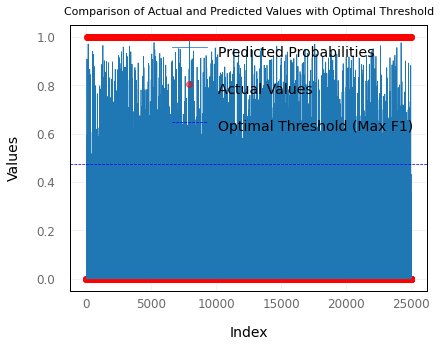

Accuracy: 0.94
Precision: 0.63
Recall: 0.55
F1 Score: 0.58


In [ ]:
import matplotlib.pyplot as plt


# Change default font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert probabilities to binary predictions using the optimal threshold
predictions = [1 if prob >= best_threshold else 0 for prob in test_values_2]


# Plot actual vs predicted values
plt.figure()
plt.plot(range(len(y_test)), test_values_2, label='Predicted Probabilities')
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values', alpha=0.5)
plt.axhline(y=best_threshold, color='blue', linestyle='--', label='Optimal Threshold (Max F1)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values with Optimal Threshold')
plt.legend()
plt.show()

# Evaluate the model with the optimal threshold
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {max_f1:.2f}')




# examples

In [ ]:
def toxicity_level(string):
    new_string = [string]
    new_string = tokenizer.texts_to_sequences(new_string)
    new_string = pad_sequences(new_string, maxlen=maxpadlen, padding='post')

    prediction = loaded_model_2.predict(new_string)

    print("Toxicity levels for '{}':".format(string))
    print('Toxic:         {:.0%}'.format(prediction[0][0]))
    print()

    return

In [ ]:
toxicity_level('go jump off a bridge jerk, ass')

1/1 [==============================] - 0s 29ms/step
Toxicity levels for 'go jump off a bridge jerk, ass':
Toxic:         95%



In [ ]:
toxicity_level('ROC Curve (Blue Line): The blue line plots the trade-off between the true positive rate and the false positive rate for different threshold values of the classifier. A perfect classifier would pass through the top-left corner (0,1), indicating a true positive rate of 1 and a false positive rate of 0.')

1/1 [==============================] - 0s 58ms/step
Toxicity levels for 'ROC Curve (Blue Line): The blue line plots the trade-off between the true positive rate and the false positive rate for different threshold values of the classifier. A perfect classifier would pass through the top-left corner (0,1), indicating a true positive rate of 1 and a false positive rate of 0.':
Toxic:         1%



In [ ]:
toxicity_level('fuck you')

1/1 [==============================] - 0s 37ms/step
Toxicity levels for 'fuck you':
Toxic:         78%



In [ ]:
toxicity_level('miss you so much')

1/1 [==============================] - 1s 537ms/step
Toxicity levels for 'miss you so much':
Toxic:         0%



In [ ]:
toxicity_level('you are a shit')

1/1 [==============================] - 0s 32ms/step
Toxicity levels for 'you are a shit':
Toxic:         78%



In [ ]:
toxicity_level('you are a nice person')

1/1 [==============================] - 0s 25ms/step
Toxicity levels for 'you are a nice person':
Toxic:         0%



The following two example shows the inefficiency to detect the variation of toxic words with special letters

In [ ]:
toxicity_level('I am &&at home, tired and silly! BUt Fu*k the weather， so cloudy in England')

1/1 [==============================] - 0s 34ms/step
Toxicity levels for 'I am &&at home, tired and silly! BUt Fu*k the weather， so cloudy in England':
Toxic:         23%



In [ ]:
toxicity_level('I am at home, tired and silly! BUt Fuck the weather， so cloudy in England')

1/1 [==============================] - 0s 27ms/step
Toxicity levels for 'I am at home, tired and silly! BUt Fuck the weather， so cloudy in England':
Toxic:         74%



In [ ]:
toxicity_level('thanks for having me for the interview for this position, machine learning scients')

1/1 [==============================] - 0s 29ms/step
Toxicity levels for 'thanks for having me for the interview for this position, machine learning scients':
Toxic:         0%



# Conclusions

Feel free to use this space to provide any additional explanations or thoughts about the test. This can include comments, critical reflections about the challenge or data, how the solution could be improved, and any other ideas for further work or relevant topics that were not included here.

* Conclusions

In this notebook, we employ a CNN+LSTM method to build a text classifier for identifying toxic comments. Initially, we ensured the completeness of the database and cleaned it, particularly addressing special characters using regex patterns, as many toxic words contain such characters. We then analyzed the distribution of sentence lengths, determining that a maximum padding length of 30 tokens strikes a good balance between accuracy and efficiency for tokenization and embedding. To capture semantic meanings and relationships between words while reducing training costs, we utilized pre-trained word embeddings.

Given the relatively small dataset of training instances and computational constraints, we opted for a CNN+LSTM hybrid model instead of cutting-edge transformers. This approach combines the strengths of CNNs for capturing local features and patterns with LSTMs for handling temporal dependencies in sequences, thus allowing for automated feature extraction. Our results demonstrate that the trained model accurately predicts explicit toxic words but struggles with variations that include special characters. Despite employing regex patterns to mitigate this issue, the model lacks automated detection and lemmatization of source words, limiting its performance.

As a result, the model achieves an F1 score around 0.6 but has difficulty surpassing 0.8. For future work, we recommend developing an algorithm to automatically detect variations in toxic vocabulary and building comprehensive regex patterns. Alternatively, acquiring a larger dataset would allow the use of transformers or properly fine-tuned specialized transformers, which excel at capturing long-range dependencies by considering all words simultaneously, thus improving toxic context understanding over longer texts.







In [ ]:
import numpy as np
from tensorflow import keras
x = np.array([1., 2., 3., 4., 5.])
x = np.reshape(x, [1, 5, 1])
max_pool_1d = keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="same")
max_pool_1d(x)

<tf.Tensor: shape=(1, 5, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.],
        [5.]]], dtype=float32)>